<a href="https://colab.research.google.com/github/leehyunggeunkeun/pytorch-study/blob/master/pytorch_0417.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

간단한 다중선형회귀 예제

Iris data를 활용하여 sepal length, sepal width, petal length의 변화에 따른 petal width 구하기!!!

In [0]:
#필요한 라이브러리 불러오기 

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

df = load_iris()

In [2]:
torch.manual_seed(1)

In [3]:
# 데이터프레임형식으로 변환
df=pd.DataFrame(data=df['data'],columns=df['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
#150 x 4라는 아주 작은 데이터셋 
#x는 모든행을 불러오고 마지막 petal width를 제외하고 불러오고, y는 모든행을 가진 petal width열만
x,y=df.values[:,:-1],df.values[:,-1:]
x.shape, y.shape

((150, 3), (150, 1))

커스텀 데이터셋 만들기

In [0]:
class Iris():
    def __init__(self):
        self.x_data = torch.FloatTensor(x)
        self.y_data = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.x_data)
  
    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y

In [0]:
dataset=Iris()
dataloader=DataLoader(dataset,batch_size=len(dataset),shuffle=True) 

In [7]:
dataset.__getitem__(0) , dataset.__len__()  #총 샘플의수 150개 0번째 샘플의 x는 5.1,3.5,1.4 y는 0.2

((tensor([5.1000, 3.5000, 1.4000]), tensor([0.2000])), 150)

In [8]:
model = nn.Linear(3,1)      #input 3 ouput 1
print(list(model.parameters())) #초기화된 w,b값 확인
optimizer = optim.SGD(model.parameters(), lr=1e-5)

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [9]:
nb_epochs=2000
train_losses=[]
for epoch in range(nb_epochs+1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        

        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)



        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        train_losses.append(cost.item())


        if epoch % 100 == 0:
            print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader),
            cost.item()
             ))



Epoch    0/2000 Batch 1/1 Cost: 0.665150
Epoch  100/2000 Batch 1/1 Cost: 0.609085
Epoch  200/2000 Batch 1/1 Cost: 0.564583
Epoch  300/2000 Batch 1/1 Cost: 0.529154
Epoch  400/2000 Batch 1/1 Cost: 0.500848
Epoch  500/2000 Batch 1/1 Cost: 0.478135
Epoch  600/2000 Batch 1/1 Cost: 0.459813
Epoch  700/2000 Batch 1/1 Cost: 0.444939
Epoch  800/2000 Batch 1/1 Cost: 0.432775
Epoch  900/2000 Batch 1/1 Cost: 0.422739
Epoch 1000/2000 Batch 1/1 Cost: 0.414378
Epoch 1100/2000 Batch 1/1 Cost: 0.407334
Epoch 1200/2000 Batch 1/1 Cost: 0.401326
Epoch 1300/2000 Batch 1/1 Cost: 0.396136
Epoch 1400/2000 Batch 1/1 Cost: 0.391590
Epoch 1500/2000 Batch 1/1 Cost: 0.387553
Epoch 1600/2000 Batch 1/1 Cost: 0.383919
Epoch 1700/2000 Batch 1/1 Cost: 0.380605
Epoch 1800/2000 Batch 1/1 Cost: 0.377545
Epoch 1900/2000 Batch 1/1 Cost: 0.374688
Epoch 2000/2000 Batch 1/1 Cost: 0.371993


[Parameter containing:
tensor([[ 0.3332, -0.2476, -0.0572]], requires_grad=True), Parameter containing:
tensor([0.2745], requires_grad=True)]


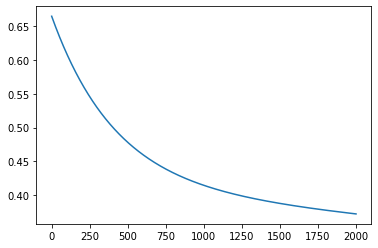

In [10]:
print(list(model.parameters())) #학습후 w와 b의 값 확인

#epoch에 따른 train_losses 변화

plt.plot(train_losses)
plt.show()

In [11]:
new_var=torch.FloatTensor([[6.9,2.0,7.1]]) 
pred_y=model(new_var)

print('훈련 후 입력이 6.9, 2.0, 7.1 일때의 예측값: ',pred_y)

훈련 후 입력이 6.9, 2.0, 7.1 일때의 예측값:  tensor([[1.6725]], grad_fn=<AddmmBackward>)
